# Ensemble Techniques

---



## Theoretical Questions and Answers

### 1. Can we use Bagging for regression problems?
**Answer:** Yes. Bagging (Bootstrap Aggregating) works for both classification and regression. For regression, typical base estimators are DecisionTreeRegressor or other regressors. Bagging averages predictions from multiple base regressors to reduce variance and improve predictive performance.

### 2. What is the difference between multiple model training and single model training?
**Answer:** Single model training fits one estimator on the training data. Multiple model training (ensembles) trains multiple base estimators (often on different subsets of data or features) and combines their predictions (e.g., averaging, majority voting, weighted voting). Ensembles reduce variance, bias (depending on technique), and often improve robustness.

### 3. Explain the concept of feature randomness in Random Forest.
**Answer:** Random Forest introduces randomness in two ways: (1) bootstrap sampling (rows) for each tree, and (2) feature randomness — at each split, a random subset of features is considered for selecting the best split. This decorrelates trees and reduces variance, improving generalization.

### 4. What is OOB (Out-of-Bag) Score?
**Answer:** With bootstrap sampling, each tree is trained on a sampled subset; about 37% of samples are left out (out-of-bag) for that tree. The OOB score is computed by aggregating predictions for each sample using only trees that did not see that sample during training. It's a built-in cross-validation-like estimate of generalization error.

### 5. How can you measure the importance of features in a Random Forest model?
**Answer:** Common methods:
- Mean decrease in impurity (MDI): average reduction in impurity (e.g., Gini or MSE) brought by splits on a feature across trees.
- Permutation importance: measure change in model performance when a feature's values are randomly permuted.
Scikit-learn provides `feature_importances_` (MDI) and `permutation_importance`.

### 6. Explain the working principle of a Bagging Classifier.
**Answer:** Bagging trains multiple base classifiers on bootstrap samples of the original dataset and combines predictions by majority vote (classification) or averaging (regression). Each base model is independent and can be the same type (e.g., DecisionTree). Bagging reduces variance and helps prevent overfitting.

### 7. How do you evaluate a Bagging Classifier’s performance?
**Answer:** Use standard classification metrics: accuracy, precision, recall, F1-score, ROC-AUC, confusion matrix, cross-validation. Compare against baseline models and use techniques like cross-validation to estimate generalization.

### 8. How does a Bagging Regressor work?
**Answer:** Similar to Bagging Classifier but for regression: train multiple regressors on bootstrap samples and average their predictions. This reduces variance and often produces more stable predictions.

### 9. What is the main advantage of ensemble techniques?
**Answer:** Ensembles combine multiple models to deliver better performance than individual models by reducing variance (Bagging), reducing bias (some Boosting methods), or leveraging complementary strengths (Stacking). They are more robust and generalize better.

### 10. What is the main challenge of ensemble methods?
**Answer:** Challenges include increased computational cost (training many models), interpretability (harder to explain), storage/memory, and risk of poor diversity leading to limited gains. Also hyperparameter tuning and deployment complexity increase.

### 11. Explain the key idea behind ensemble techniques.
**Answer:** The key idea is to combine multiple, diverse models to obtain a single, stronger predictor. Diversity among models (different data samples, features, or algorithms) ensures their errors are less correlated, allowing aggregation to reduce overall error.

### 12. What is a Random Forest Classifier?
**Answer:** Random Forest is an ensemble of decision trees (for classification) trained using bootstrap samples and random feature selection at each split. Predictions are made by majority voting across trees.

### 13. What are the main types of ensemble techniques?
**Answer:** The main types:
- Bagging (Bootstrap Aggregating): reduces variance (e.g., RandomForest).
- Boosting: sequentially trains models to correct previous errors (e.g., AdaBoost, Gradient Boosting, XGBoost, LightGBM).
- Stacking (Stacked Generalization): trains multiple base models and a meta-model that learns to combine their predictions.

### 14. What is ensemble learning in machine learning?
**Answer:** Ensemble learning combines multiple models to improve predictive performance, robustness, and generalization compared to single models.

### 15. When should we avoid using ensemble methods?
**Answer:** Avoid when:
- Interpretability is crucial (ensembles are less transparent).
- Computational resources are limited.
- Dataset is extremely small (ensembles may overfit if diversity is poor).
- A single, well-regularized model already performs sufficiently well and simplicity is desired.

### 16. How does Bagging help in reducing overfitting?
**Answer:** Bagging trains several models on different bootstrap samples and aggregates their predictions. Since each model sees a different dataset, individual model overfitting patterns average out, reducing variance and therefore overfitting.

### 17. Why is Random Forest better than a single Decision Tree?
**Answer:** A single decision tree has high variance and is sensitive to training data noise. Random Forest averages many decorrelated trees, reducing variance, improving robustness, and often yielding higher accuracy.

### 18. What is the role of bootstrap sampling in Bagging?
**Answer:** Bootstrap sampling (sampling with replacement) generates multiple diverse training sets for base estimators. It provides the differences among base models that ensemble methods rely on to reduce variance.

### 19. What are some real-world applications of ensemble techniques?
**Answer:** Applications include fraud detection, medical diagnosis, credit scoring, recommendation systems, production forecasting, image classification, and many Kaggle-winning solutions.

### 20. What is the difference between Bagging and Boosting?
**Answer:** Bagging trains base models in parallel on bootstrap samples and aggregates them (reduces variance). Boosting trains models sequentially, where each model focuses on errors of previous ones (reduces bias and can reduce variance but may overfit if not regularized). Examples: Bagging -> RandomForest; Boosting -> AdaBoost, Gradient Boosting.


## Practical — runnable code

**Datasets used:**
- sklearn.datasets.load_breast_cancer (classification)
- sklearn.datasets.fetch_california_housing (regression) or make_regression for demos

Run cells sequentially.


In [55]:

# Basic imports and reproducibility
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, mean_squared_error
from sklearn.datasets import load_breast_cancer, fetch_california_housing, make_regression
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
RANDOM_STATE = 42
print("Ready. RANDOM_STATE =", RANDOM_STATE)


Ready. RANDOM_STATE = 42


### 21) Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy

In [56]:

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

base_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

# UPDATED: base_estimator → estimator
bag_clf = BaggingClassifier(
    estimator=base_dt,
    n_estimators=25,
    random_state=RANDOM_STATE
)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Bagging (DecisionTree) test accuracy: {acc:.4f}")
print(classification_report(y_test, y_pred))



Bagging (DecisionTree) test accuracy: 0.9474
              precision    recall  f1-score   support

           0       0.95      0.90      0.93        42
           1       0.95      0.97      0.96        72

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



### 22) Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)

In [57]:

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Use California housing for regression
housing = fetch_california_housing()
Xr, yr = housing.data, housing.target

Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    Xr, yr, test_size=0.2, random_state=RANDOM_STATE
)

base_dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)

# UPDATED: base_estimator → estimator
bag_r = BaggingRegressor(
    estimator=base_dtr,
    n_estimators=25,
    random_state=RANDOM_STATE
)

bag_r.fit(Xr_train, yr_train)
yr_pred = bag_r.predict(Xr_test)

mse = mean_squared_error(yr_test, yr_pred)
print(f"Bagging Regressor MSE: {mse:.4f}")



Bagging Regressor MSE: 0.2632


### 23) Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores

In [58]:

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)
print("Random Forest accuracy:", accuracy_score(y_test, y_rf))

importances = rf.feature_importances_
feat_names = data.feature_names
fi_df = pd.DataFrame({'feature': feat_names, 'importance': importances}).sort_values('importance', ascending=False)
fi_df.head(15)


Random Forest accuracy: 0.956140350877193


,feature,importance
23,worst area,0.140016
27,worst concave points,0.129530
20,worst radius,0.097696
7,mean concave points,0.090885
22,worst perimeter,0.072226
2,mean perimeter,0.069574
0,mean radius,0.068676
6,mean concavity,0.057638
3,mean area,0.049172
26,worst concavity,0.034340


### 24) Train a Random Forest Regressor and compare its performance with a single Decision Tree

In [59]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rfr.fit(Xr_train, yr_train)
rfr_pred = rfr.predict(Xr_test)
rfr_mse = mean_squared_error(yr_test, rfr_pred)

dtr = DecisionTreeRegressor(random_state=RANDOM_STATE)
dtr.fit(Xr_train, yr_train)
dtr_pred = dtr.predict(Xr_test)
dtr_mse = mean_squared_error(yr_test, dtr_pred)

print(f"RandomForestRegressor MSE: {rfr_mse:.4f}")
print(f"Single DecisionTreeRegressor MSE: {dtr_mse:.4f}")


RandomForestRegressor MSE: 0.2554
Single DecisionTreeRegressor MSE: 0.4952


### 25) Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

In [60]:

rf_oob = RandomForestClassifier(n_estimators=200, oob_score=True, random_state=RANDOM_STATE)
rf_oob.fit(X_train, y_train)
print("OOB score:", rf_oob.oob_score_)


OOB score: 0.9604395604395605


### 26) Train a Bagging Classifier using SVM as a base estimator and print accuracy

In [61]:

from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

svc = SVC(probability=True, kernel='rbf', random_state=RANDOM_STATE)

bag_svc = BaggingClassifier(
    estimator=svc,        # UPDATED
    n_estimators=15,
    random_state=RANDOM_STATE
)

bag_svc.fit(X_train, y_train)
y_bagsvc = bag_svc.predict(X_test)

print("Bagging with SVM accuracy:", accuracy_score(y_test, y_bagsvc))


Bagging with SVM accuracy: 0.9122807017543859


### 27) Train a Random Forest Classifier with different numbers of trees and compare accuracy

In [62]:

n_list = [10, 50, 100, 200]
results = []
for n in n_list:
    rf_tmp = RandomForestClassifier(n_estimators=n, random_state=RANDOM_STATE)
    rf_tmp.fit(X_train, y_train)
    acc_tmp = accuracy_score(y_test, rf_tmp.predict(X_test))
    results.append((n, acc_tmp))
results_df = pd.DataFrame(results, columns=['n_estimators', 'test_accuracy'])
results_df


,n_estimators,test_accuracy
0,10,0.938596
1,50,0.956140
2,100,0.956140
3,200,0.956140


### 28) Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score

In [63]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier

logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)

bag_log = BaggingClassifier(
    estimator=logreg,      # UPDATED PARAMETER
    n_estimators=25,
    random_state=RANDOM_STATE
)

bag_log.fit(X_train, y_train)

y_proba = bag_log.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_proba)

print("Bagging (LogisticRegression) ROC-AUC:", auc)




Bagging (LogisticRegression) ROC-AUC: 0.9953703703703703


### 29) Train a Random Forest Regressor and analyze feature importance scores

In [64]:

rfr = RandomForestRegressor(n_estimators=100, random_state=RANDOM_STATE)
rfr.fit(Xr_train, yr_train)
rfr_importances = rfr.feature_importances_
rfr_df = pd.DataFrame({'feature': housing.feature_names, 'importance': rfr_importances}).sort_values('importance', ascending=False)
rfr_df.head(10)


,feature,importance
0,MedInc,0.524871
5,AveOccup,0.138443
6,Latitude,0.088936
7,Longitude,0.088629
1,HouseAge,0.054593
2,AveRooms,0.044272
4,Population,0.030650
3,AveBedrms,0.029606


### 30) Train an ensemble model using both Bagging and Random Forest and compare accuracy

In [65]:

# Bagging with DecisionTree (already trained earlier as bag_clf), RandomForest as rf
bag_acc = accuracy_score(y_test, bag_clf.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))
print(f"Bagging (DecisionTree) accuracy: {bag_acc:.4f}")
print(f"Random Forest accuracy: {rf_acc:.4f}")


Bagging (DecisionTree) accuracy: 0.9474
Random Forest accuracy: 0.9561


### 31) Train a Random Forest Classifier and tune hyperparameters using GridSearchCV

In [66]:

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}
rf_grid = RandomForestClassifier(random_state=RANDOM_STATE)
gs = GridSearchCV(rf_grid, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print("Best params:", gs.best_params_)
print("Best cross-val score:", gs.best_score_)
best_rf = gs.best_estimator_
print("Test accuracy with best estimator:", accuracy_score(y_test, best_rf.predict(X_test)))


Best params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Best cross-val score: 0.9582171488323458
Test accuracy with best estimator: 0.9473684210526315


###  32) Train a Bagging Regressor with different numbers of base estimators and compare performance

In [67]:

n_list = [5, 10, 25, 50]
res = []

for n in n_list:
    model = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=RANDOM_STATE),  # UPDATED
        n_estimators=n,
        random_state=RANDOM_STATE
    )

    model.fit(Xr_train, yr_train)
    ypred = model.predict(Xr_test)
    res.append((n, mean_squared_error(yr_test, ypred)))

pd.DataFrame(res, columns=['n_estimators', 'mse'])


,n_estimators,mse
0,5,0.305975
1,10,0.282424
2,25,0.263191
3,50,0.257299


### 33) Train a Random Forest Classifier and analyze misclassified samples

In [68]:

# Use best_rf from GridSearchCV
y_pred = best_rf.predict(X_test)
mis_idx = np.where(y_pred != y_test)[0]
print("Number of misclassified samples:", len(mis_idx))
# Show a few misclassified sample indices and their true/predicted labels
pd.DataFrame({'index': mis_idx[:10], 'true': y_test[mis_idx][:10], 'predicted': y_pred[mis_idx][:10]})


Number of misclassified samples: 6


,index,true,predicted
0,3,1,0
1,16,1,0
2,25,1,0
3,35,0,1
4,53,0,1
5,65,0,1


### 34) Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier

In [69]:

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
dt.fit(X_train, y_train)
print("Decision Tree test accuracy:", accuracy_score(y_test, dt.predict(X_test)))
print("Bagging test accuracy:", accuracy_score(y_test, bag_clf.predict(X_test)))


Decision Tree test accuracy: 0.9122807017543859
Bagging test accuracy: 0.9473684210526315


### 35) Train a Random Forest Classifier and visualize the confusion matrix

Confusion matrix:
 [[39  3]
 [ 3 69]]


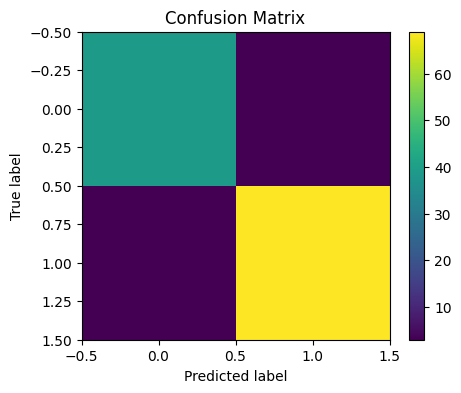

In [70]:

cm = confusion_matrix(y_test, best_rf.predict(X_test))
print("Confusion matrix:\n", cm)

# Simple plot (one plot per instructions)
plt.figure(figsize=(5,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.colorbar()
plt.show()


### 36) Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy

In [71]:

from sklearn.ensemble import StackingClassifier
estimators = [
    ('dt', DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ('svc', SVC(probability=True, random_state=RANDOM_STATE)),
    ('lr', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
]
stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)
stack.fit(X_train, y_train)
print("Stacking Classifier accuracy:", accuracy_score(y_test, stack.predict(X_test)))


Stacking Classifier accuracy: 0.956140350877193


### 37) Train a Random Forest Classifier and print the top 5 most important features

In [72]:

top5 = fi_df.head(5)
top5


,feature,importance
23,worst area,0.140016
27,worst concave points,0.129530
20,worst radius,0.097696
7,mean concave points,0.090885
22,worst perimeter,0.072226


### 38) Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score

In [73]:

from sklearn.metrics import precision_score, recall_score, f1_score
y_bag = bag_clf.predict(X_test)
print("Precision:", precision_score(y_test, y_bag))
print("Recall:", recall_score(y_test, y_bag))
print("F1-score:", f1_score(y_test, y_bag))


Precision: 0.9459459459459459
Recall: 0.9722222222222222
F1-score: 0.958904109589041


### 39) Train a Random Forest Classifier and analyze the effect of max_depth on accuracy

In [74]:

depths = [None, 2, 4, 6, 8, 10]
rows = []
for d in depths:
    m = RandomForestClassifier(n_estimators=100, max_depth=d, random_state=RANDOM_STATE)
    m.fit(X_train, y_train)
    rows.append((d, accuracy_score(y_test, m.predict(X_test))))
pd.DataFrame(rows, columns=['max_depth', 'test_accuracy'])


,max_depth,test_accuracy
0,NaN,0.956140
1,2.0,0.947368
2,4.0,0.956140
3,6.0,0.947368
4,8.0,0.956140
5,10.0,0.956140


### 40) Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance

In [75]:

from sklearn.neighbors import KNeighborsRegressor

models = {
    'DecisionTree': DecisionTreeRegressor(random_state=RANDOM_STATE),
    'KNeighbors': KNeighborsRegressor()
}

res = []

for name, base in models.items():
    m = BaggingRegressor(
        estimator=base,          # UPDATED
        n_estimators=25,
        random_state=RANDOM_STATE
    )

    m.fit(Xr_train, yr_train)
    ypred = m.predict(Xr_test)
    res.append((name, mean_squared_error(yr_test, ypred)))

pd.DataFrame(res, columns=['base_estimator', 'mse'])



,base_estimator,mse
0,DecisionTree,0.263191
1,KNeighbors,1.079995


### 41) Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score

In [76]:

y_score = best_rf.predict_proba(X_test)[:,1]
print("ROC-AUC:", roc_auc_score(y_test, y_score))


ROC-AUC: 0.9947089947089947


### 42) Train a Bagging Classifier and evaluate its performance using cross-validation

In [77]:

cv_scores = cross_val_score(bag_clf, X, y, cv=5, scoring='accuracy', n_jobs=-1)
print("Cross-val accuracies:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-val accuracies: [0.9122807  0.92105263 0.98245614 0.95614035 0.97345133]
Mean CV accuracy: 0.9490762303990063


### 43) Train a Random Forest Classifier and plot the Precision-Recall curve

Precision-Recall AUC: 0.9969222856399133


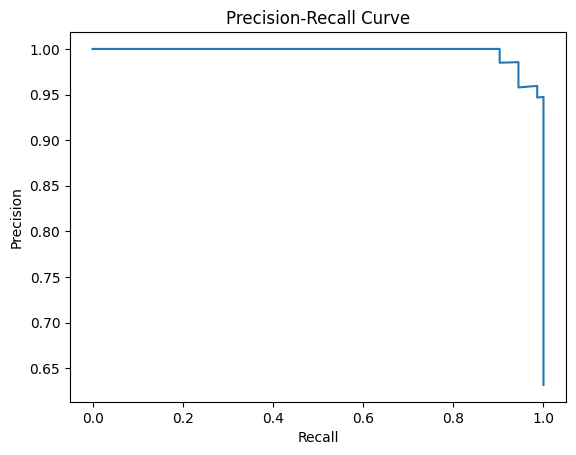

In [78]:

from sklearn.metrics import precision_recall_curve, auc
y_scores = best_rf.predict_proba(X_test)[:,1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

plt.figure()
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


### 44) Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy

In [79]:

estimators = [
    ('rf', RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE)),
    ('lr', LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
]
stack2 = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), n_jobs=-1)
stack2.fit(X_train, y_train)
print("Stacking (RF+LR) accuracy:", accuracy_score(y_test, stack2.predict(X_test)))


Stacking (RF+LR) accuracy: 0.956140350877193


### 45) Train a Bagging Regressor with different levels of bootstrap samples and compare performance

In [80]:

levels = [0.5, 0.7, 1.0]
res = []

for lvl in levels:
    m = BaggingRegressor(
        estimator=DecisionTreeRegressor(random_state=RANDOM_STATE),  # UPDATED
        n_estimators=25,
        max_samples=lvl,
        random_state=RANDOM_STATE
    )

    m.fit(Xr_train, yr_train)
    ypred = m.predict(Xr_test)
    res.append((lvl, mean_squared_error(yr_test, ypred)))

pd.DataFrame(res, columns=['max_samples', 'mse'])



,max_samples,mse
0,0.5,0.278297
1,0.7,0.272360
2,1.0,0.263191
